# 4.1 Regression

In this section, we will use machine learning to predict *continuous* values that are associated with text data.

Our text data are:

*   `scotus1900.csv`: 28.0 MB, `shape = (1000,3)`, a sample of opinions from the United States Supreme Court.

*  `scotus10k_df.csv`: 247.6MB, `shape = (10000,3)`,  sample of opinions from the United States Supreme Court.

## Exploratory data analysis on scotus_df

In [1]:
import pandas as pd
scotus_df = pd.read_csv("datasets/scotus1900.csv")
print(scotus_df.shape, "\n")
print(pd.Series(scotus_df.columns))

(1000, 3) 

0    case_title
1          year
2     case_text
dtype: object


In [2]:
print(scotus_df.describe())

              year
count  1000.000000
mean   1951.581000
std      30.690444
min    1900.000000
25%    1923.000000
50%    1956.000000
75%    1977.000000
max    2009.000000


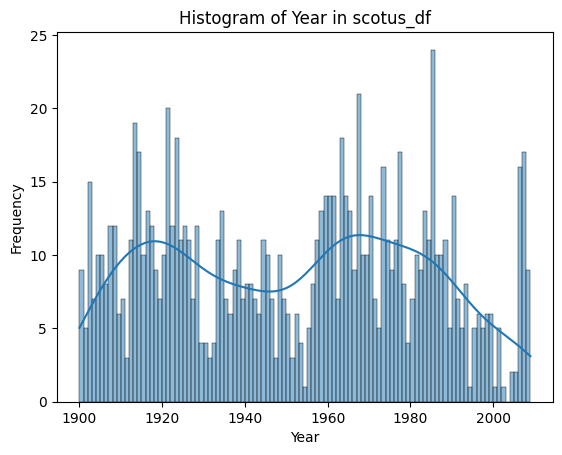

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram of the year column in scotus_df using seaborn
sns.histplot(data=scotus_df, x='year', binwidth=1, kde=True)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram of Year in scotus_df')
plt.show()

In [5]:
# !pip install scikit-learn
import sklearn

# import the TfidfVectorizer and default list of English stop words
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# import normalize
from sklearn.preprocessing import normalize

scotus_vectorizer = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, 
                                    ngram_range=(2, 3), 
                                    max_features=1000, 
                                    token_pattern=r'\b[^\d\W][^\d\W]+\b')

#fit and transform the vectorizer
tfidf_matrix = scotus_vectorizer.fit_transform(scotus_df.case_text)

# normalize all predictors
X = normalize(tfidf_matrix, norm='l2')


# Create a DataFrame
scotus_transformed = pd.DataFrame(X.toarray(), columns=scotus_vectorizer.get_feature_names())
print('Top 5 rows of the DataFrame: \n', scotus_transformed.head())

Top 5 rows of the DataFrame: 
    ___ ct  abuse discretion  acre feet  ...  wrongful death  years ago  york city
0     0.0               0.0        0.0  ...             0.0        0.0   0.000000
1     0.0               0.0        0.0  ...             0.0        0.0   0.000000
2     0.0               0.0        0.0  ...             0.0        0.0   0.000000
3     0.0               0.0        0.0  ...             0.0        0.0   0.252106
4     0.0               0.0        0.0  ...             0.0        0.0   0.000000

[5 rows x 1000 columns]


* Setting `max_features=1000` means that the vectorizer will only consider the top 1000 most frequent terms in the corpus. Terms that do not make it into the top 1000 are ignored.
*  **Normalization of TF-IDF values** is often useful to ensure that the feature vectors are scaled appropriately and to prevent some terms from dominating the others.
*   **L2 Normalization** (`Euclidean normalization`): This method scales the TF-IDF vectors such that their Euclidean norm (magnitude) becomes `1`. It ensures that the vector has a constant length,

In [6]:
# creating the target variable
y = scotus_df["year"]
print(y.shape)
print(X.shape)

(1000,)
(1000, 1000)


In [9]:
from sklearn.model_selection import train_test_split

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

In [11]:
print("X_train shape = ", X_train.shape, "\n")
print("y_train shape = ", y_train.shape, "\n")

print("X_test shape = ", X_test.shape, "\n")
print("y_test shape = ", y_test.shape, "\n")

X_train shape =  (800, 1000) 

y_train shape =  (800,) 

X_test shape =  (200, 1000) 

y_test shape =  (200,) 



## [Support Vector Regression (SVR) using linear kernel in SciKit Learn](https://www.geeksforgeeks.org/support-vector-regression-svr-using-linear-and-non-linear-kernels-in-scikit-learn/?ref=lbp)

Support vector regression (SVR) is a type of support vector machine (SVM) that is used for regression tasks. 
It is a supervised learning algorithm that can be used for classification or regression tasks. It tries to find the hyperplane in a high-dimensional space that maximally separates different classes or output values.

*   **Kernel** SVR uses a linear or non-linear kernels. Kernels are functions that determine the similarity between input vectors. A A linear kernel is a simple dot product between two input vectors.

* SVR has several hyperparameters that you can adjust to control the behavior of the model. The parameter controls the trade-off between the insensitive loss and the sensitive loss. A larger value of ‘C’ means that the model will try to minimize the insensitive loss more, while a smaller value of C means that the model will be more lenient in allowing larger errors.


*  Like any machine learning model, it’s important to evaluate the performance of an SVR model. 

    *  Split the data into a training set and a test set, and use the training set to fit the model and the test set to evaluate         *  Use metrics like `mean squared error` (`MSE`) or `mean absolute error` (`MAE`) to measure the error between the predicted and true output values.


In [39]:
from sklearn.svm import SVR
import numpy as np

# create an instance of svm model
svm_regressor = SVR(kernel='linear')

# fit the svm model to the text data
svm_regressor.fit(X_train, y_train)

In [41]:
# Training accuracy
from sklearn.metrics import mean_squared_error, r2_score

y_pred_train = svm_regressor.predict(X_train)
svr_rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
svr_r2_train = r2_score(y_train, y_pred_train)

print(f"Training: Root Mean Squared Error: {svr_rmse_train}")
print(f"Training: R-squared: {svr_r2_train}")

Training: Root Mean Squared Error: 21.34322440653338
Training: R-squared: 0.5112444668327769


In [43]:
# Testing accuracy
# predict values on the test set
y_pred = svm_regressor.predict(X_test)

# evaluate the performance of the model using root mean squared error and R-squared
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Root Mean Squared Error: 21.35627669949373
R-squared: 0.5311149679427905


In [14]:
import pandas as pd

print(pd.DataFrame({"y_test": y_test, "y_pred": y_pred}))

     y_test       y_pred
565    1963  1958.412028
297    1913  1950.456204
566    1962  1952.345193
560    1918  1933.423021
542    1958  1955.092541
..      ...          ...
242    1986  1959.412135
780    1983  1956.579831
247    1928  1945.238386
950    1961  1958.124229
559    1921  1945.213514

[200 rows x 2 columns]


### Cross validation



In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVR

# create an instance of svm model
svm_regressor = SVR(kernel='linear')

# Create a K-fold cross-validator
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate 'neg_mean_squared_error'
scores = cross_val_score(svm_regressor, X, y, cv=cv, scoring='neg_mean_squared_error')


# Calculate the average RMSE score
avg_rmse = np.mean(np.sqrt(-scores))

# Calculate the average R^2 score
r2 = np.mean(cross_val_score(svm_regressor, X, y, cv=cv, scoring = 'r2'))

In [17]:
# print average rmse and average r2 
print("average rmse =", avg_rmse)
print("r2 = ", r2,"\n")

average rmse = 21.68106010285071
r2 =  0.4981114421193767 



In [10]:
# to get all the possible values for scoring parameter
# sklearn.metrics.get_scorer_names()

In [22]:
from sklearn.model_selection import cross_val_predict

pred = cross_val_predict(svm_regressor, X, y, cv=cv)

print(pred.shape)

(1000,)


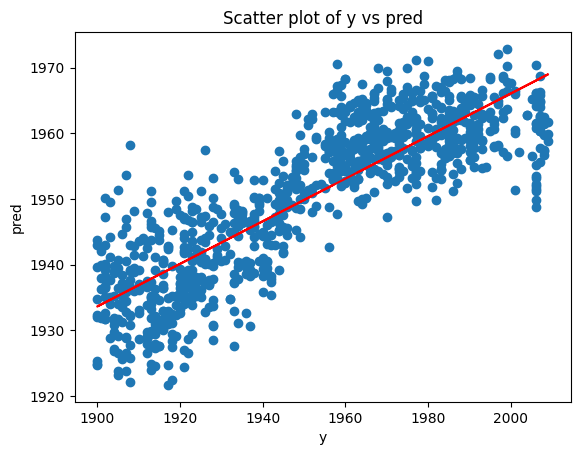

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y, pred)
plt.xlabel('y')
plt.ylabel('pred')
plt.title('Scatter plot of y vs pred')

# Add regression line
regression_line = np.polyfit(y, pred, 1)
plt.plot(y, np.polyval(regression_line, y), color='red')

plt.show()

### scotus10k_df.csv at 10,000 data points.

In [24]:
# processing time about 3 min
import pandas as pd

scotus10k_df = pd.read_csv("datasets/scotus10k_df.csv")
scotus10k_df.columns

svm_vectorizer = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, 
                                    ngram_range=(2, 3), 
                                    max_features=1000, 
                                    token_pattern=r'\b[^\d\W][^\d\W]+\b')

#fit and transform the vectorizer
tfidf_matrix = svm_vectorizer.fit_transform(scotus10k_df.case_text)

# normalize all predictors
X = normalize(tfidf_matrix, norm='l2')

y = scotus10k_df["year"]

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

# create an instance of svm model
svm_regressor = SVR(kernel='linear')

# fit the svm model to the text data
svm_regressor.fit(X_train, y_train)

# predict values on the test set
y_pred = svm_regressor.predict(X_test)

# evaluate the performance of the model using root mean squared error and R-squared
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

Root Mean Squared Error: 12.33231028525732
R-squared: 0.8377651951063309


In [27]:
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Root Mean Squared Error: 12.33231028525732
R-squared: 0.8377651951063309


### Cross validation of svm_regressor on scotus10k_df with k=5.

In [29]:
# Processing time about 6 minutes

# create an instance of svm model
svm_regressor = SVR(kernel='linear')

# Create a K-fold cross-validator
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate 'neg_mean_squared_error'
mse_scores = cross_val_score(svm_regressor, X, y, cv=cv, scoring='neg_mean_squared_error')


# Calculate the average RMSE score
rmse_scores = np.sqrt(-mse_scores)
avg_rmse = np.mean(rmse_scores)

# Calculate the average R^2 score
r2_scores = cross_val_score(svm_regressor, X, y, cv=cv, scoring = 'r2')
avg_r2 = np.mean(r2_scores)


In [30]:
# import pandas as pd
# import numpy as np

print(pd.DataFrame({"Model": ["Support Vector Regressor","Cross Validation on SVR"],
                    "rmse": [rmse, avg_rmse], 
                    "r^2":[r2, avg_r2]}),"\n")

print("Cross Validation of SVM Result per Fold \n")
print(pd.DataFrame({"Fold": np.arange(5), "rmse": rmse_scores, "r^2": r2_scores}),"\n")

# 

                      Model      rmse       r^2
0  Support Vector Regressor  12.33231  0.837765
1   Cross Validation on SVR  12.30113  0.839744 

Cross Validation of SVM Result per Fold 

   Fold       rmse       r^2
0     0  12.513822  0.837896
1     1  12.222681  0.839967
2     2  12.351728  0.834065
3     3  11.985396  0.850147
4     4  12.432021  0.836645 



## Random forest regressor

Random Forest is an ensemble learning technique used for both classification and regression problems. In this technique, multiple decision trees are created and their output is averaged to give the final result. 

Random Forest Regression is known to produce very robust results by avoiding overfitting.

In [44]:
# Preprocessing the text data
import pandas as pd
import numpy as np
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.preprocessing import normalize

scotus1k_df = pd.read_csv("datasets/scotus1900.csv")

scotus1k_vectorizer = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, 
                                    ngram_range=(2, 3), 
                                    max_features=1000, 
                                    token_pattern=r'\b[^\d\W][^\d\W]+\b')

#fit and transform the vectorizer
tfidf_matrix = scotus1k_vectorizer.fit_transform(scotus1k_df.case_text)

# normalize all predictors
X = normalize(tfidf_matrix, norm='l2')
y = scotus1k_df["year"]

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.model_selection import GridSearchCV

# Initialize the RandomForestRegressor with 10 decision trees
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state=1234)

rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=1234)

In [46]:
# Training accuracy
y_pred_train = rf_regressor.predict(X_train)
rf_rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rf_r2_train = r2_score(y_train, y_pred_train)

print(f"Training: Root Mean Squared Error: {rf_rmse_train}")
print(f"Training: R-squared: {rf_r2_train}")

Training: Root Mean Squared Error: 5.057613073377593
Training: R-squared: 0.9725550257312561


In [47]:
# Testing accuracy

y_pred_test = rf_regressor.predict(X_test)
rf_rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
rf_r2_test = r2_score(y_test, y_pred_test)
print(f"Testing: Root Mean Squared Error: {rf_rmse_test}")
print(f"Testing: R-squared: {rf_r2_test}")

Testing: Root Mean Squared Error: 8.985363097838615
Testing: R-squared: 0.9169983827963228


In [48]:
import pandas as pd

scotus10k_df = pd.read_csv("datasets/scotus10k_df.csv")

scotus10k_rf_vectorizer = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, 
                                    ngram_range=(2, 3), 
                                    max_features=1000, 
                                    token_pattern=r'\b[^\d\W][^\d\W]+\b')

#fit and transform the vectorizer
scotus10k_tfidf_matrix = scotus10k_rf_vectorizer.fit_transform(scotus10k_df.case_text)

# normalize all predictors
X = normalize(scotus10k_tfidf_matrix, norm='l2')

y = scotus10k_df["year"]

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

# create an instance of rf model
scotus10k_rf_regressor = RandomForestRegressor(n_estimators = 10, random_state=1234)  

# fit the svm model to the text data
scotus10k_rf_regressor.fit(X_train, y_train)

# predict values on the test set
scotus10k_y_pred = scotus10k_rf_regressor.predict(X_test)

# evaluate the performance of the model using root mean squared error and R-squared

scotus10k_rf_rmse = mean_squared_error(y_test, scotus10k_y_pred, squared=False)
scotus10k_rf_r2 = r2_score(y_test, scotus10k_y_pred)

print(f"Root Mean Squared Error: {scotus10k_rf_rmse}")
print(f"R-squared: {scotus10k_rf_r2}")

Root Mean Squared Error: 7.353128992649389
R-squared: 0.9423234182317103
